# Loading Data and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter 

sns.set_theme(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('credit_card_churn.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
df.drop(['CLIENTNUM'], inplace=True, axis=1)

# 1. Exploratory data analysis

In [5]:
df.Attrition_Flag.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

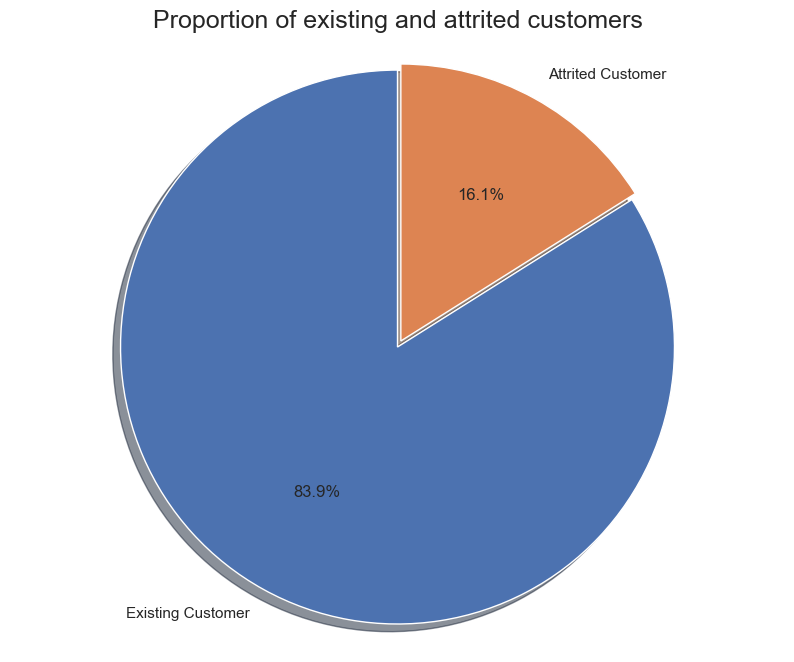

In [6]:
labels = 'Existing Customer', 'Attrited Customer'
sizes = [df.Attrition_Flag[df['Attrition_Flag']=='Existing Customer'].count(),
         df.Attrition_Flag[df['Attrition_Flag']=='Attrited Customer'].count()]
explode = (0, 0.025)

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')

plt.title("Proportion of existing and attrited customers", size = 18)

plt.show()

<Axes: xlabel='Attrition_Flag', ylabel='Months_on_book'>

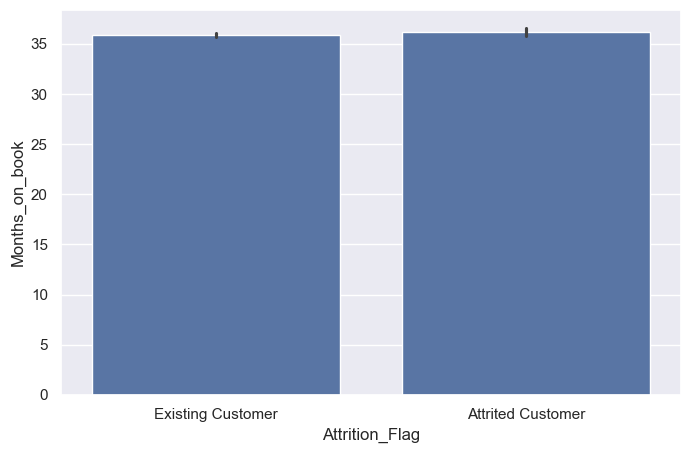

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Attrition_Flag', y='Months_on_book')

In [8]:
df.loc[df.Attrition_Flag == 'Existing Customer', 'Attrition_Flag'], df.loc[df.Attrition_Flag == 'Attrited Customer', 'Attrition_Flag'] = 0, 1

df.astype({'Attrition_Flag': 'int32'})

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Text(0, 0.5, 'Survival probability')

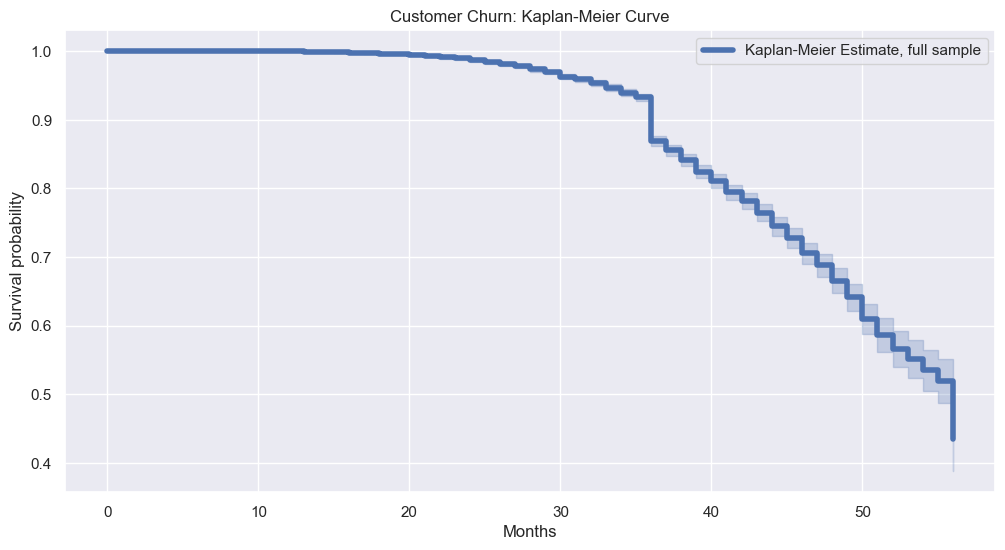

In [9]:
kmf = KaplanMeierFitter()

kmf.fit(df.Months_on_book, df.Attrition_Flag, label = 'Kaplan-Meier Estimate, full sample')

kmf.plot(linewidth=4, figsize=(12, 6))
plt.title('Customer Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')

In [10]:
# list of categorical variables to plot
cat_vars = df.columns[df.dtypes == "object"]

print(cat_vars)

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


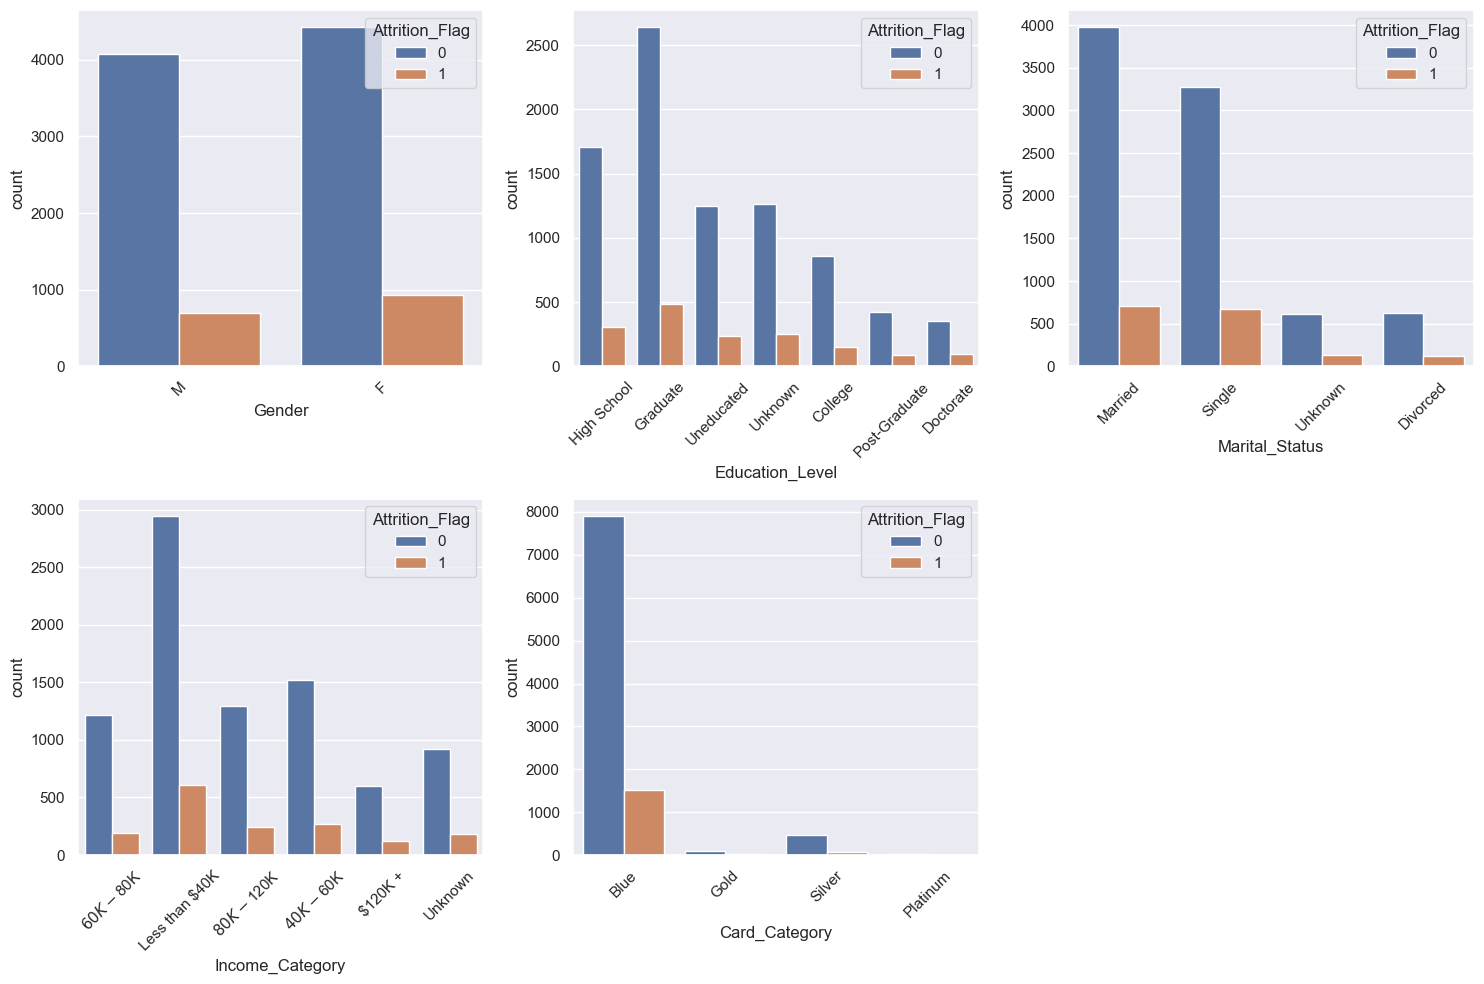

In [11]:
# create figure with subplots
cat_vars = cat_vars.delete(0)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Attrition_Flag', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# adjust spacing between subplots
axs[5].remove()
fig.tight_layout()

# show plot
plt.show()


In [12]:
# list of categorical variables to plot
num_vars = df.columns[df.dtypes != "object"]

print(num_vars)

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


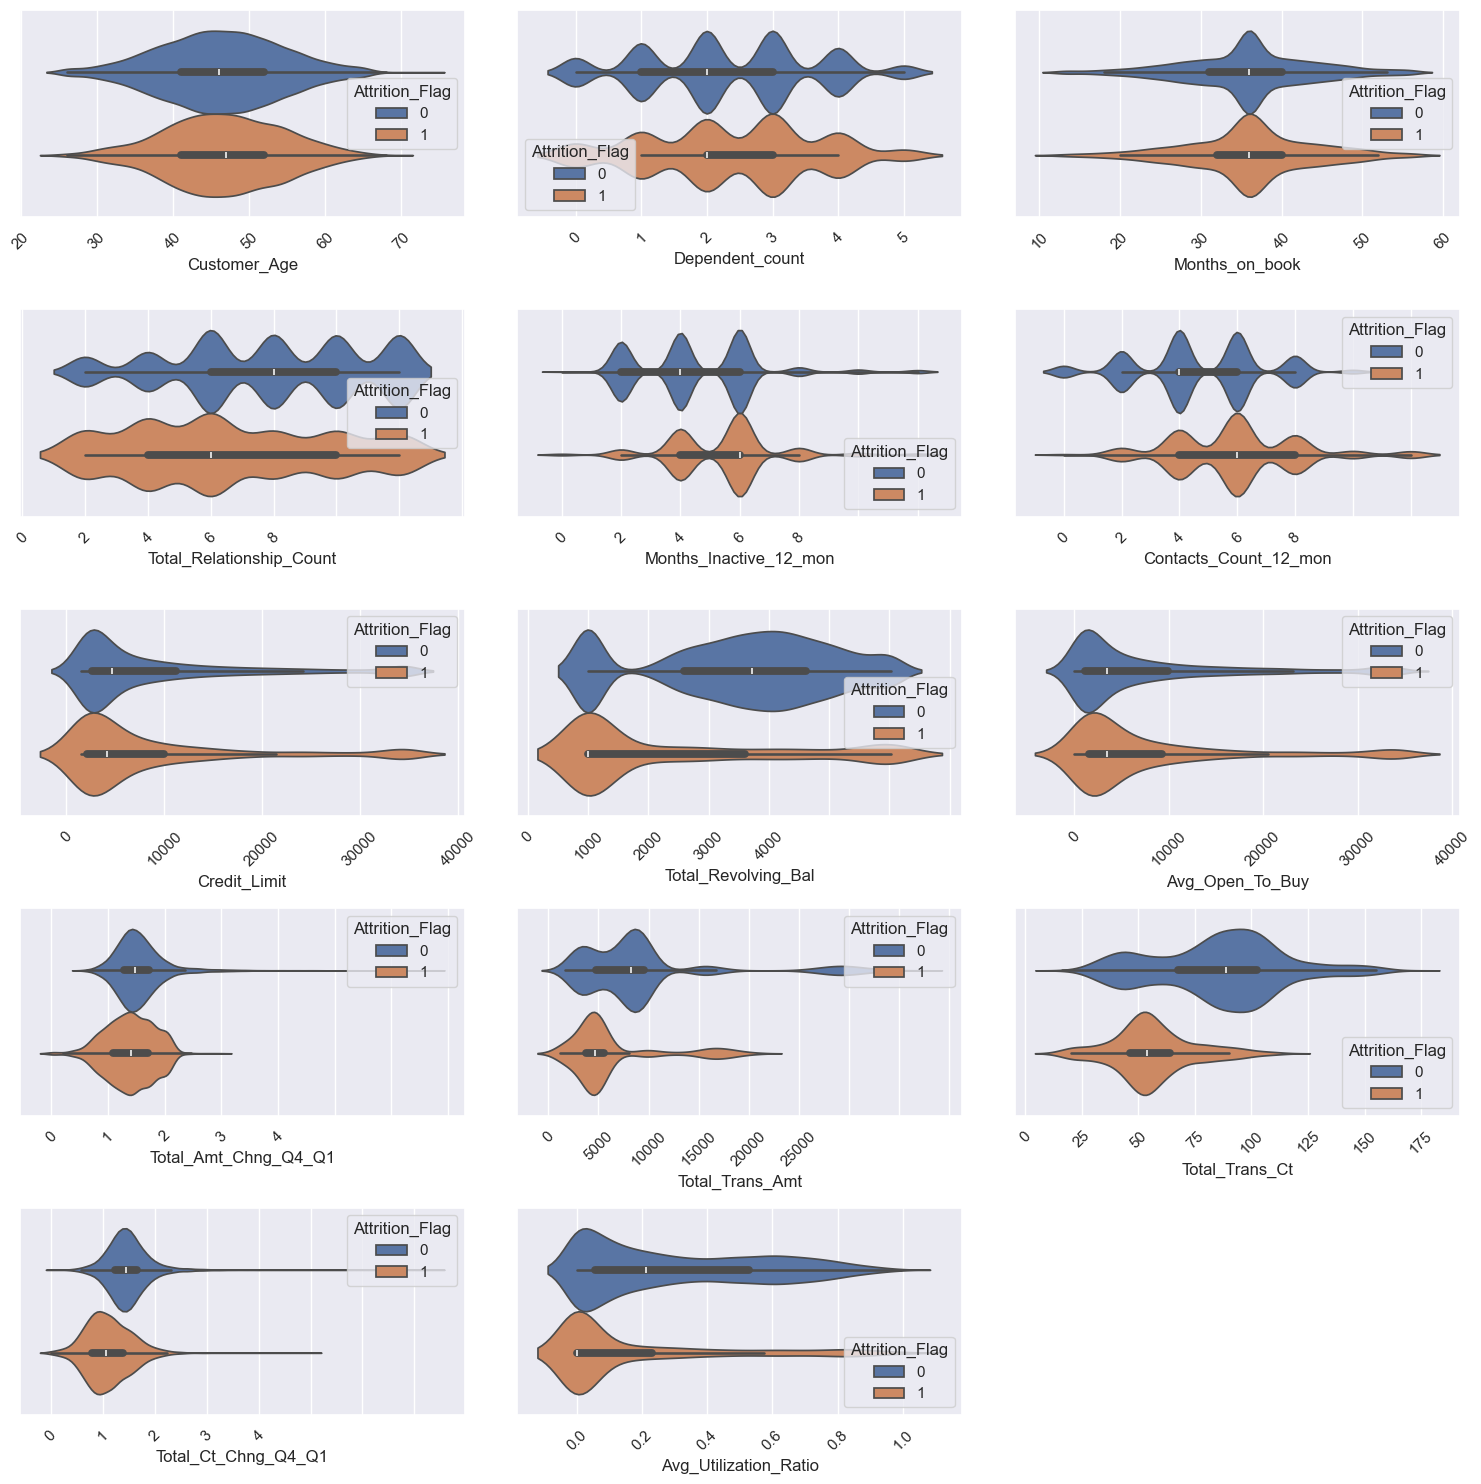

In [13]:
num_vars.delete(2)

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, hue='Attrition_Flag', ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

fig.tight_layout()
axs[14].remove()

plt.show()

# 2 Survival Analysis

## 2.1 Analysis of impact of variable 'Education Level'

In [14]:
val = df.Education_Level.unique()

print(val)

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


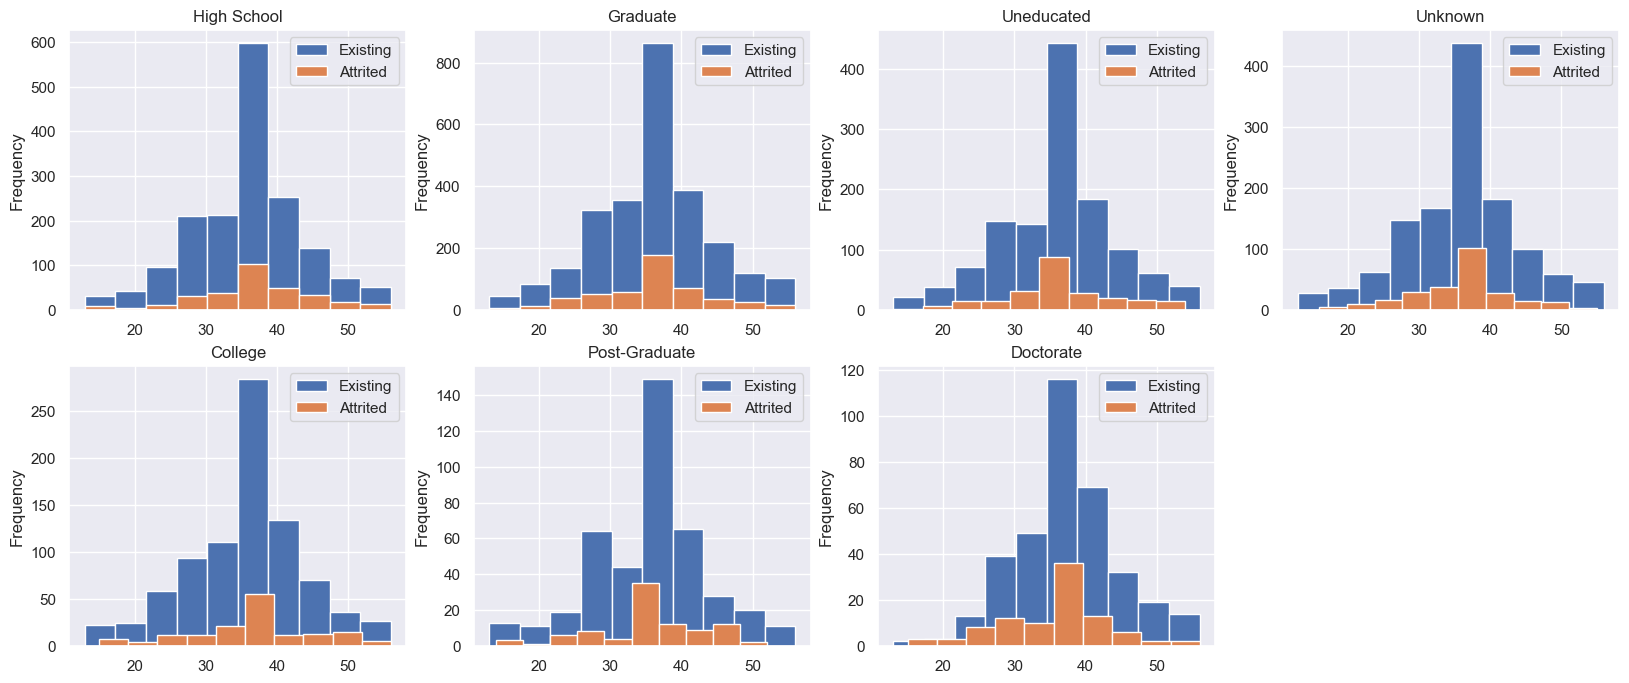

In [15]:
# Let's look at the 'Education_Level' variable

fig, ax = plt.subplots(2,4, figsize=(20,8))
ax = ax.flatten()

df_arr = []
for i in range(len(val)):
    df_i = df[df.Education_Level == val[i]]
    df_i.groupby('Attrition_Flag')['Months_on_book'].plot(kind='hist', ax=ax[i], title="{}".format(val[i]))
    ax[i].legend(labels=['Existing', 'Attrited'])
    df_arr.append(df_i)

ax[7].remove()


Text(0, 0.5, 'Survival probability')

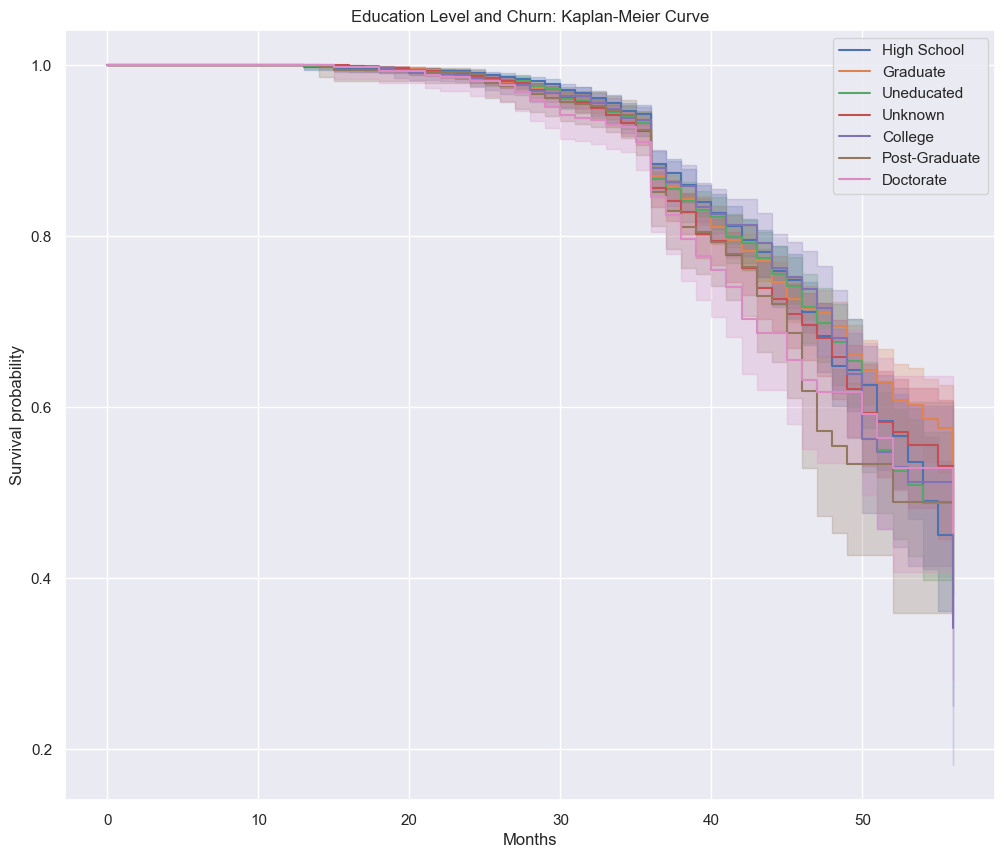

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12,10))

for i, df_i in enumerate(df_arr):

    kmf.fit(df_i.Months_on_book, df_i.Attrition_Flag)
    kmf.plot(label='{}'.format(val[i]))

plt.title('Education Level and Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')


## 2.1.1 Cox Proportional Hazards Model

In [17]:
# Setting up the data

from sklearn import preprocessing

dfu = df

col = 'Education_Level'
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(dfu[col].unique())
dfu[col] = label_encoder.transform(dfu[col])
    
label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encoder_name_mapping)

{'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}


In [18]:
dfu.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,3,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,2,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,2,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,3,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,5,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [19]:
dfd = dfu[[col]]
dfd['Churn_value'] = dfu.Attrition_Flag
dfd['Months'] = dfu.Months_on_book

dfd.head()

,Education_Level,Churn_value,Months
0,3,0,39
1,2,0,44
2,2,0,36
3,3,0,34
4,5,0,21


In [20]:
cph = CoxPHFitter()
cph.fit(dfd, duration_col='Months', event_col='Churn_value')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 10127 total observations, 8500 right-censored observations>
             duration col = 'Months'
                event col = 'Churn_value'
      baseline estimation = breslow
   number of observations = 10127
number of events observed = 1627
   partial log-likelihood = -13495.94
         time fit was run = 2024-02-21 17:48:52 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Education_Level   0.01       1.01       0.01            -0.02             0.04                 0.98                 1.04

                  cmp to    z    p   -log2(p)
covariate                                    
Education_Level     0.00 0.82 0.41       1.29
---
Concordance = 0.50
Partial AIC = 26993.88
log-likelihood ratio test = 0.68 on 1 df
-log2(p) of ll-ratio test = 1.29



<Axes: xlabel='log(HR) (95% CI)'>

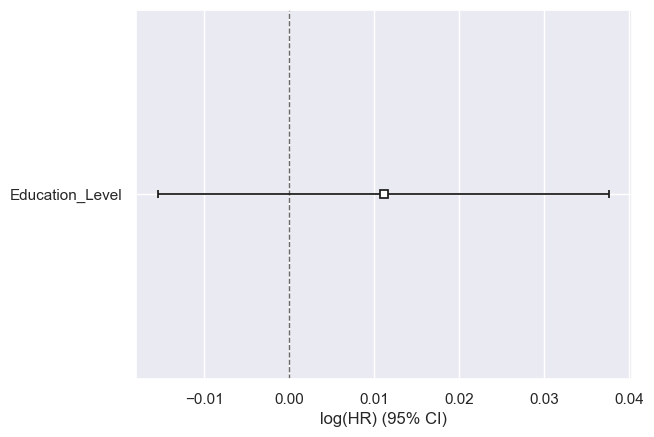

In [21]:
cph.plot()

<Axes: >

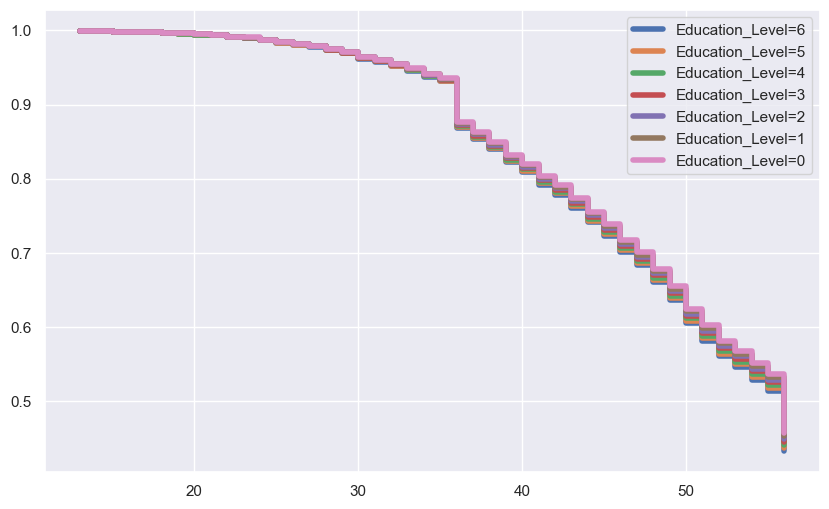

In [22]:
cph.plot_covariate_groups('Education_Level', [6, 5, 4, 3, 2, 1, 0], plot_baseline=False, figsize=(10, 6), lw=4)

## 2.2 Analysis of impact of variable 'Income Category'

In [23]:
val = df.Income_Category.unique()

print(val)

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


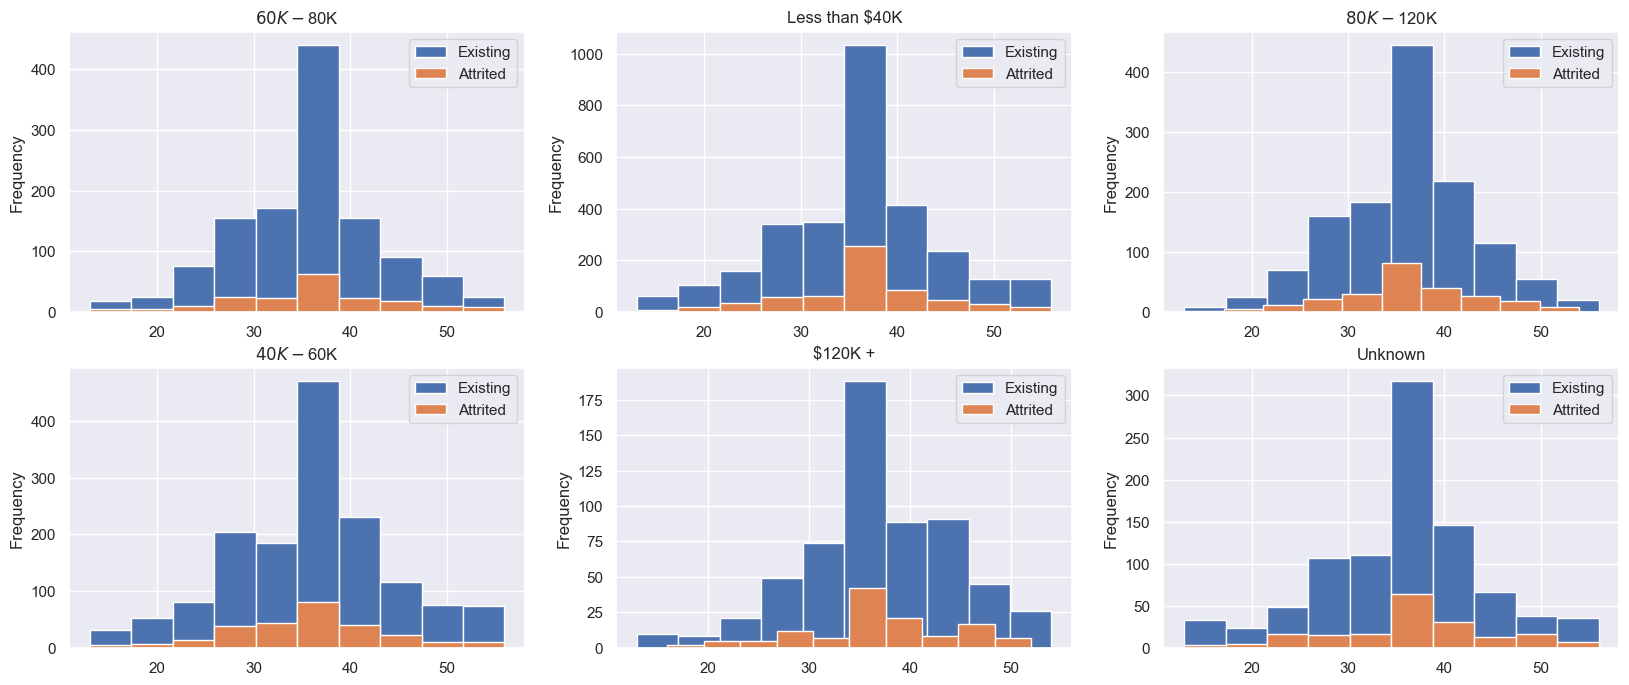

In [24]:
# Let's look at the 'Income Category' variable

fig, ax = plt.subplots(2,3, figsize=(20,8))
ax = ax.flatten()

df_arr = []
for i in range(len(val)):
    df_i = df[df.Income_Category == val[i]]
    df_i.groupby('Attrition_Flag')['Months_on_book'].plot(kind='hist', ax=ax[i], title="{}".format(val[i]))
    ax[i].legend(labels=['Existing', 'Attrited'])
    df_arr.append(df_i)


Text(0, 0.5, 'Survival probability')

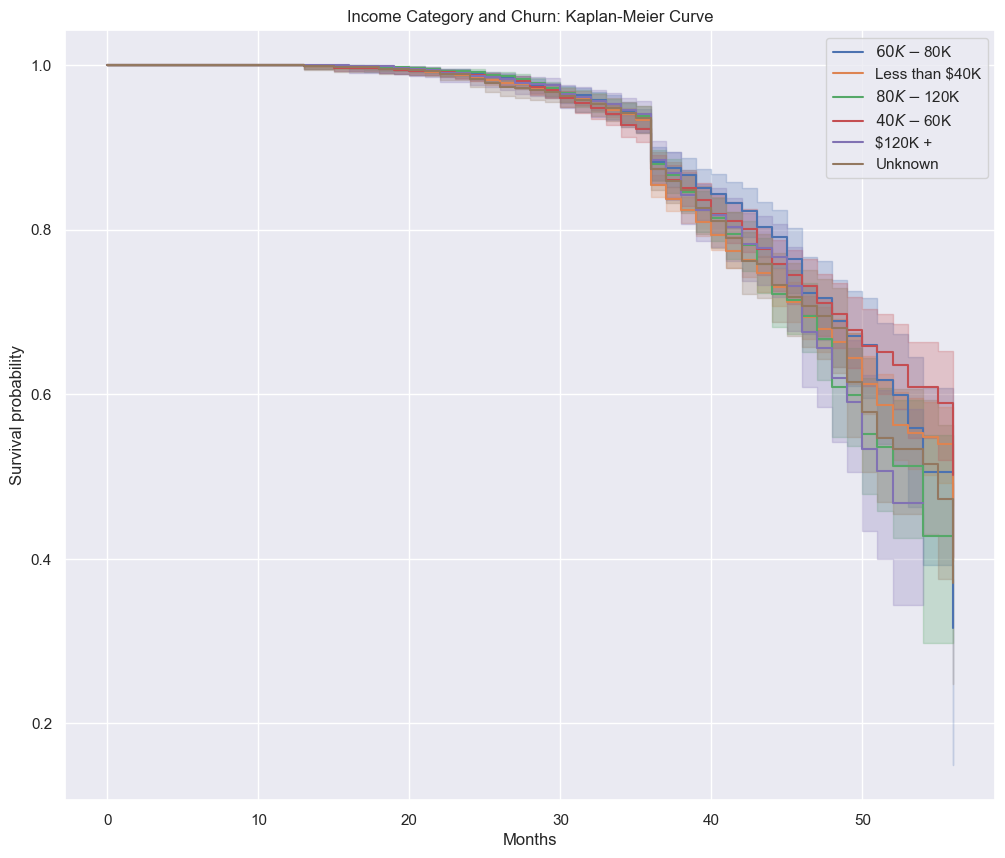

In [25]:
fig, ax = plt.subplots(1,1, figsize=(12,10))

for i, df_i in enumerate(df_arr):

    kmf.fit(df_i.Months_on_book, df_i.Attrition_Flag)
    kmf.plot(label='{}'.format(val[i]))

plt.title('Income Category and Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')


## 2.2.1 Cox Proportional Hazards Model

In [26]:
# Setting up the data

from sklearn import preprocessing

dfu = df

col = 'Income_Category'
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(dfu[col].unique())
dfu[col] = label_encoder.transform(dfu[col])
    
label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encoder_name_mapping)

{'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}


In [27]:
dfu.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,3,Married,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,2,Single,4,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,2,Married,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,3,Unknown,4,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,5,Married,2,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [28]:
dfd = dfu[[col]]
dfd['Churn_value'] = dfu.Attrition_Flag
dfd['Months'] = dfu.Months_on_book

dfd.head()

,Income_Category,Churn_value,Months
0,2,0,39
1,4,0,44
2,3,0,36
3,4,0,34
4,2,0,21


In [29]:
cph = CoxPHFitter()
cph.fit(dfd, duration_col='Months', event_col='Churn_value')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 10127 total observations, 8500 right-censored observations>
             duration col = 'Months'
                event col = 'Churn_value'
      baseline estimation = breslow
   number of observations = 10127
number of events observed = 1627
   partial log-likelihood = -13494.75
         time fit was run = 2024-02-21 17:48:53 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Income_Category   0.03       1.03       0.02            -0.00             0.06                 1.00                 1.06

                  cmp to    z    p   -log2(p)
covariate                                    
Income_Category     0.00 1.74 0.08       3.62
---
Concordance = 0.51
Partial AIC = 26991.50
log-likelihood ratio test = 3.06 on 1 df
-log2(p) of ll-ratio test = 3.64



<Axes: xlabel='log(HR) (95% CI)'>

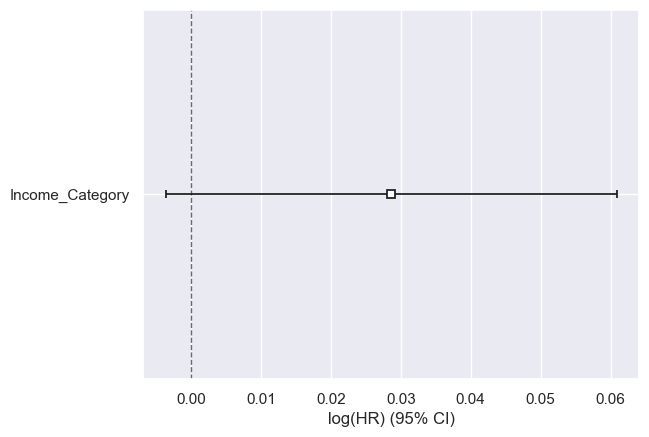

In [30]:
cph.plot()

<Axes: >

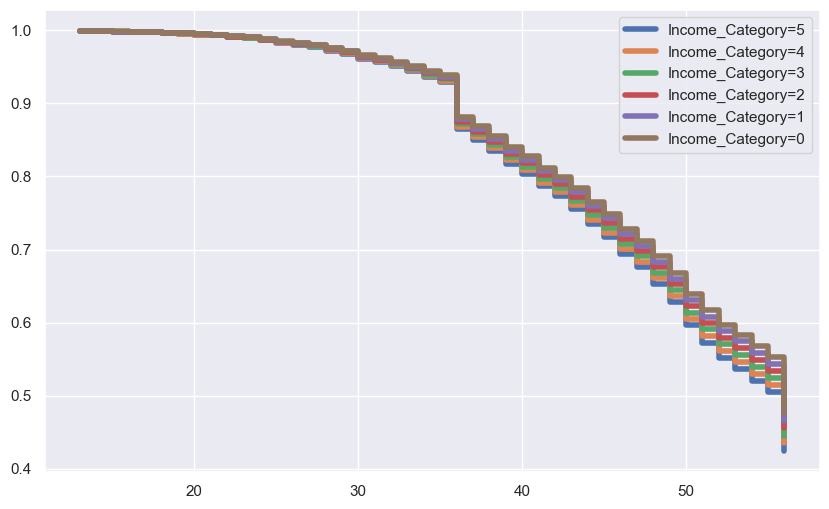

In [31]:
cph.plot_covariate_groups('Income_Category', [5, 4, 3, 2, 1, 0], plot_baseline=False, figsize=(10, 6), lw=4)